## CNN for music genre classification

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, GlobalAveragePooling2D
from tensorflow.keras.initializers import HeNormal
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint

In [25]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices('GPU'))

Num GPUs Available: 1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Folder setup

In [47]:
SPEC_TRAIN_FOLDER = "Data/AugmentedSpectrograms/train"
SPEC_TEST_FOLDER = "Data/Spectograms/test"
SPEC_VAL_FOLDER = "Data/Spectograms/val"

## Constants

In [27]:
IMAGE_SIZE = (130, 128)

In [49]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=SPEC_TRAIN_FOLDER,
    labels='inferred',
    label_mode='int',
    image_size=IMAGE_SIZE,
    batch_size=32,
)

Found 17398 files belonging to 10 classes.


In [48]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=SPEC_TEST_FOLDER,
    labels='inferred',
    label_mode='int',
    image_size=IMAGE_SIZE,
    batch_size=32,
    color_mode='rgb'
)

Found 1998 files belonging to 10 classes.


In [51]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=SPEC_VAL_FOLDER,
    labels='inferred',
    label_mode='int',
    image_size=IMAGE_SIZE,
    batch_size=32,
    color_mode='rgb'
)

Found 1998 files belonging to 10 classes.


In [31]:
def get_model(input_shape):
    input_shape = (input_shape[0], input_shape[1], 3)
    model = Sequential([
        Conv2D(32, kernel_size=3, padding='same', activation='relu', kernel_initializer=HeNormal(), input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(64, kernel_size=3, padding='same', activation='relu', kernel_initializer=HeNormal()),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(128, kernel_size=3, padding='same', activation='relu', kernel_initializer=HeNormal()),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        Dropout(0.3),

        Flatten(),
        Dense(128, activation='relu', kernel_initializer=HeNormal()),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model


In [42]:
check_point = ModelCheckpoint(
    filepath='best_model_aug.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [33]:
def compile_model(model):
   model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [34]:
def train_model(model, train_ds, epochs):
    model.fit(train_ds, epochs=epochs, callbacks=[check_point], validation_data=val_ds)

In [35]:
model = get_model(IMAGE_SIZE)
model.summary()

/home/diego/GenreGenie/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 130, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 65, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 65, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 65, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289,866 (16.36 MB)

 Trainable params: 4,289,418 (16.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [36]:
compile_model(model)

In [43]:
train_model(model, train_ds, 30)

# model.load_weights('/home/diego/GenreGenie/best_model.h5')

Epoch 1/30
541/544 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9428 - loss: 0.1915
Epoch 1: val_accuracy improved from -inf to 0.79300, saving model to best_model_aug.keras
544/544 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9427 - loss: 0.1916 - val_accuracy: 0.7930 - val_loss: 1.6336
Epoch 2/30
543/544 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9444 - loss: 0.1827
Epoch 2: val_accuracy did not improve from 0.79300
544/544 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9444 - loss: 0.1827 - val_accuracy: 0.7065 - val_loss: 2.3695
Epoch 3/30
544/544 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9486 - loss: 0.1674
Epoch 3: val_accuracy improved from 0.79300 to 0.79450, saving model to best_model_aug.keras
544/544 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9486 - loss: 0.1674 - val_accuracy: 0.7945 - val_loss: 1.8287
Epoch 4/30
541/544 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9486 - loss: 0.1719
Epoch 4: val_accuracy did not improve from 0.79450
544/544 ━━━━

In [52]:
test_loss, test_acc = model.evaluate(test_ds)
val_loss, val_acc = model.evaluate(val_ds)
print('\n Simple model')
print('\nTest accuracy:', test_acc)
print('\nTest lost:', test_loss)
print('\nValidation accuracy:', val_acc)
print('\nValidation lost:', val_loss)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9244 - loss: 0.6471
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8941 - loss: 1.0667

 Simple model

Test accuracy: 0.923923909664154

Test lost: 0.6702069044113159

Validation accuracy: 0.8828828930854797

Validation lost: 1.0176260471343994


In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
val_loss, val_acc = model.evaluate(val_ds)
print('\n Augmented model')
print('\nTest accuracy:', test_acc)
print('\n Test lost:', test_loss)
print('\nValidation accuracy:', val_acc)
print('\nValidation lost:', val_loss)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8097 - loss: 1.5887

Validation accuracy: 0.8069999814033508

 Validation lost: 1.5219022035598755


2025-05-25 14:21:54.825588: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


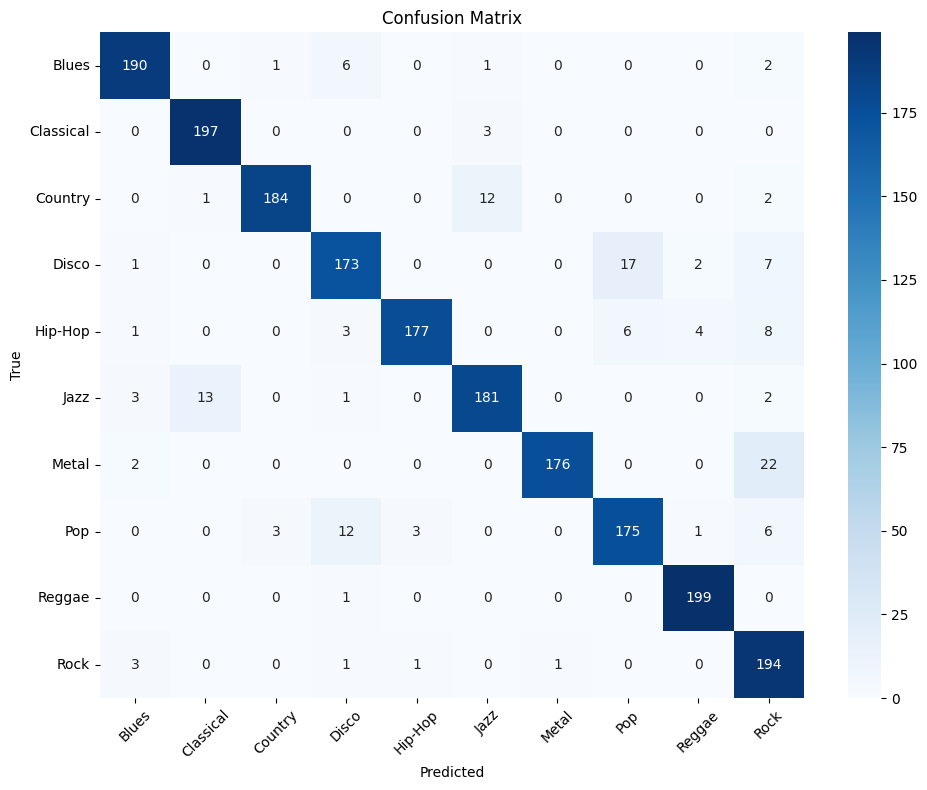

In [53]:
genre_labels = [
    "Blues", "Classical", "Country", "Disco", "Hip-Hop",
    "Jazz", "Metal", "Pop", "Reggae", "Rock"
]


all_images = []
all_labels = []
for images, labels in test_ds:
    all_images.append(images)
    all_labels.append(labels)
all_images = np.concatenate(all_images, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

predictions = model.predict(all_images)
y_pred = np.argmax(predictions, axis=1)
y_true = all_labels

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=genre_labels, yticklabels=genre_labels
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()